# **Tame Your Python**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [3]:
# Load data
dataset = fetch_lfw_people(min_faces_per_person=100)
 
N, H, W = dataset.images.shape
X = dataset.data
y = dataset.target
target_names = dataset.target_names

In [4]:
print(target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [5]:
print(dataset.images.shape)
print(dataset.data.shape)
print(dataset.target.shape)

(1140, 62, 47)
(1140, 2914)
(1140,)


In [6]:
print(H*W)

2914


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [0]:
from sklearn.decomposition import FactorAnalysis
n_components = 80
decomposer = FactorAnalysis(n_components=n_components).fit(X_train)

X_train_d = decomposer.transform(X_train)
X_test_d = decomposer.transform(X_test)

In [10]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True)
model.fit(X_train_d, y_train)

Iteration 1, loss = 1.51072105
Validation score: 0.495146
Iteration 2, loss = 1.08841327
Validation score: 0.543689
Iteration 3, loss = 0.84954937
Validation score: 0.679612
Iteration 4, loss = 0.64782954
Validation score: 0.776699
Iteration 5, loss = 0.50536605
Validation score: 0.805825
Iteration 6, loss = 0.40013929
Validation score: 0.854369
Iteration 7, loss = 0.32299082
Validation score: 0.864078
Iteration 8, loss = 0.26514075
Validation score: 0.873786
Iteration 9, loss = 0.21937782
Validation score: 0.873786
Iteration 10, loss = 0.18391417
Validation score: 0.873786
Iteration 11, loss = 0.15568602
Validation score: 0.883495
Iteration 12, loss = 0.13294148
Validation score: 0.883495
Iteration 13, loss = 0.11467758
Validation score: 0.883495
Iteration 14, loss = 0.09968946
Validation score: 0.873786
Iteration 15, loss = 0.08747755
Validation score: 0.864078
Iteration 16, loss = 0.07724854
Validation score: 0.864078
Iteration 17, loss = 0.06862393
Validation score: 0.864078
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1024,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [0]:
y_pred = model.predict(X_test_d)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.97      0.97      0.97        29
  Donald Rumsfeld       0.57      0.80      0.67         5
    George W Bush       0.89      0.95      0.92        43
Gerhard Schroeder       0.88      0.74      0.80        19
       Tony Blair       0.88      0.78      0.82        18

         accuracy                           0.89       114
        macro avg       0.84      0.85      0.84       114
     weighted avg       0.89      0.89      0.89       114



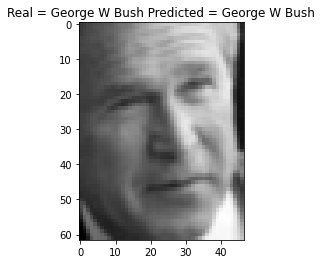

In [14]:
idx = np.random.randint(0,len(y_pred))
plt.figure()
plt.imshow(X_test[idx].reshape((H,W)), cmap = 'gray')
plt.title("Real = " + str(target_names[y_test[idx]]) + " Predicted = " + str(target_names[y_pred[idx]]))
plt.show()